<a href="https://colab.research.google.com/github/alberto20/AI-Lab3/blob/master/vyr040_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Data

Using TensorFlow backend.


Total samples: 1587078
Train samples: 1586588
Test samples: 490
Data sample: @stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.
Value: 4
categorical example:  [0. 0. 0. 0. 1.]


<function matplotlib.pyplot.show>

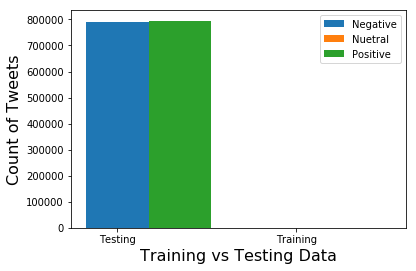

In [ ]:
import csv
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import keras
from sklearn.preprocessing import LabelEncoder

zip_ref = zipfile.ZipFile("data-lab4.zip", 'r')
zip_ref.extractall()

x_test = []
x_train = []
y_train = []
y_test = []

ntest = 0
ptest = 0
btest = 0

ntrain = 0
ptrain = 0
btrain = 0

g_ytrain = y_train
g_ytest = y_test

inputFile = csv.reader(open('data-lab4/testing.csv', 'r', encoding = "ISO-8859 -1"))

for line in inputFile:
  y_test.append(line[0])
  x_test.append(line[5])
  if line[0] == '0':
    btest = btest +1
  if line[0] == '2':
    ntest = ntest +1
  if line[0] == '4':
    ptest = ptest +1

inputFile = csv.reader(open('data-lab4/training.csv', 'r', encoding = "ISO-8859 -1"))

for line in inputFile:
  y_train.append(line[0])
  x_train.append(line[5])
  if line[0] == '0':
    btrain = btrain +1
  if line[0] == '2':
    ntrain = ntrain +1
  if line[0] == '4':
    ptrain = ptrain +1

total = len(y_train) + len(y_test)

print( 'Total samples: ' + str(total) )
print( 'Train samples: ' + str(len(y_train)) )
print( 'Test samples: ' + str(len(y_test)) )

print( 'Data sample: ' + x_test[0])
print( 'Value: ' + str(y_test[0]))


#print(len(g_ytrain))
#print(len(g_ytest))

y_train = keras.utils.to_categorical( y_train )
y_test = keras.utils.to_categorical( y_test )

print( 'categorical example: ', y_test[0] )

vectorizer = CountVectorizer( min_df=0, lowercase=False, max_df=0.8, max_features=5000, stop_words='english' )
vectorizer.fit( x_test )
vectorizer.vocabulary_
x_train = vectorizer.transform( x_train )
x_test = vectorizer.transform( x_test )

Negative = [btrain, btest]
Positive = [ptrain, ptest]
Nuetral = [ntrain, ntest]

#print(Positive)

plt.bar(np.arange(2), Negative, .35)
plt.bar(np.arange(2)+ .35, Nuetral, .35)
plt.bar(np.arange(2)+ .35, Positive, .35)
plt.xticks(np.arange(2), ('Testing', 'Training'))
plt.xlabel('Training vs Testing Data', fontsize = 16)
plt.ylabel('Count of Tweets', fontsize = 16)
plt.legend(['Negative', 'Nuetral', 'Positive'])
plt.show

Question 2: Classification

In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = x_train.shape[1]  # Number of features

model = Sequential()
model.add()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test),
          batch_size=35, shuffle=True)

print()
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                24370     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 24,425
Trainable params: 24,425
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 1586588 samples, validate on 490 samples
Epoch 1/5
1586588/1586588 [==============================] - 106s 67us/step - loss: 0.6334 - acc: 0.6454 - val_loss: 2.9057 - val_acc: 0.5714
Epoch 2/5
1586588/1586588 [==============================] - 104s 66us/step - loss: 0.5631 - acc: 0.7032 - val_loss: 3.1639 - val_acc: 0.5857
Epoch 3/5
1586588/1586588 [==============================] - 101s 64us/step - lo

Question 3: Evaluation

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.70      0.84      0.77       171
           2       0.00      0.00      0.00       139
           4       0.53      0.84      0.65       180

   micro avg       0.60      0.60      0.60       490
   macro avg       0.41      0.56      0.47       490
weighted avg       0.44      0.60      0.51       490



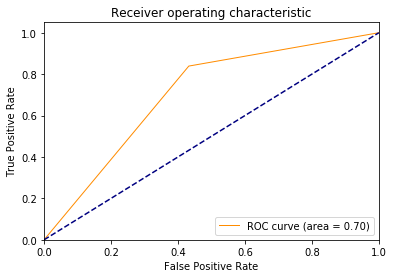

In [ ]:
from sklearn import metrics
from numpy import argmax
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict_classes( x_test )
y_test = np.argmax( y_test, axis=1 )

report = metrics.classification_report( y_test, y_pred)
print( report )

fpr, tpr, threshold = metrics.roc_curve( y_test, y_pred, pos_label=4)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()